In [1]:
import pandas as pd

#Referência da base de dados utlizada: https://sci2s.ugr.es/keel/dataset/data/classification/thyroid-names.txt

dados = pd.read_csv('thyroid.csv')
dados.head()

,Age,Sex,On_thyroxine,Query_on_thyroxine,On_antithyroid_medication,Sick,Pregnant,Thyroid_surgery,I131_treatment,Query_hypothyroid,Query_hyperthyroid,Lithium,Goitre,Tumor,Hypopituitary,Psych,TSH,T3,TT4,T4U,FTI,Class
0,0.73,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0.00060,0.015,0.120,0.082,0.146,3
1,0.24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00025,0.030,0.143,0.133,0.108,3
2,0.47,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00190,0.024,0.102,0.131,0.078,3
3,0.64,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00090,0.017,0.077,0.090,0.085,3
4,0.23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00025,0.026,0.139,0.090,0.153,3


In [2]:
x = dados[['Age', ' Sex', ' On_thyroxine', ' Query_on_thyroxine',
       ' On_antithyroid_medication', ' Sick', ' Pregnant', ' Thyroid_surgery',
       ' I131_treatment', ' Query_hypothyroid', ' Query_hyperthyroid',
       ' Lithium', ' Goitre', ' Tumor', ' Hypopituitary', ' Psych', ' TSH',
       ' T3', ' TT4', ' T4U', ' FTI',]]

In [3]:
x.head()

,Age,Sex,On_thyroxine,Query_on_thyroxine,On_antithyroid_medication,Sick,Pregnant,Thyroid_surgery,I131_treatment,Query_hypothyroid,Query_hyperthyroid,Lithium,Goitre,Tumor,Hypopituitary,Psych,TSH,T3,TT4,T4U,FTI
0,0.73,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0.00060,0.015,0.120,0.082,0.146
1,0.24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00025,0.030,0.143,0.133,0.108
2,0.47,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00190,0.024,0.102,0.131,0.078
3,0.64,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00090,0.017,0.077,0.090,0.085
4,0.23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00025,0.026,0.139,0.090,0.153


In [4]:
y = dados[' Class']

In [5]:
y.head()

0    3
1    3
2    3
3    3
4    3
Name:  Class, dtype: int64

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25, stratify = y)

scaler = StandardScaler()
treino_x = scaler.fit_transform(raw_treino_x)
teste_x = scaler.fit_transform(raw_teste_x)

print(f'Treinaremos com {len(treino_x)} elementos e testaremos com {len(teste_x)} elementos')

Treinaremos com 5400 elementos e testaremos com 1800 elementos


In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

modelo = Sequential()

In [8]:
modelo.add(Dense(activation='relu', input_dim=len(x.columns), units=500, kernel_initializer='uniform'))
modelo.add(Dense(activation='relu', units=100, kernel_initializer='uniform'))
modelo.add(Dense(activation='relu', units=50, kernel_initializer='uniform'))
modelo.add(Dense(activation='softmax', units=4, kernel_initializer='uniform'))

In [9]:
modelo.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
modelo.save('mlp_model_exemple.h5')

In [11]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

dummy = DummyClassifier()
dummy.fit(treino_x, treino_y)
previsoes_dummy = dummy.predict(teste_x)
acuracia = accuracy_score(teste_y, previsoes_dummy)
print(f'Taxa de acerto para o dummy classifier ou baseline foi {acuracia * 100:.2f}%')

Taxa de acerto para o dummy classifier ou baseline foi 85.89%


/usr/local/lib/python3.7/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


In [12]:
history = modelo.fit(treino_x, to_categorical(treino_y), batch_size=54, epochs=50, validation_data=(teste_x, to_categorical(teste_y)))
previsoes = modelo.predict(teste_x)

Epoch 1/50
100/100 [==============================] - 1s 9ms/step - loss: 0.7981 - accuracy: 0.8799 - val_loss: 0.2047 - val_accuracy: 0.9261
Epoch 2/50
100/100 [==============================] - 0s 4ms/step - loss: 0.1902 - accuracy: 0.9291 - val_loss: 0.1571 - val_accuracy: 0.9428
Epoch 3/50
100/100 [==============================] - 0s 3ms/step - loss: 0.1316 - accuracy: 0.9449 - val_loss: 0.1135 - val_accuracy: 0.9539
Epoch 4/50
100/100 [==============================] - 0s 4ms/step - loss: 0.0832 - accuracy: 0.9695 - val_loss: 0.1008 - val_accuracy: 0.9689
Epoch 5/50
100/100 [==============================] - 0s 4ms/step - loss: 0.0685 - accuracy: 0.9763 - val_loss: 0.0947 - val_accuracy: 0.9744
Epoch 6/50
100/100 [==============================] - 0s 3ms/step - loss: 0.0518 - accuracy: 0.9834 - val_loss: 0.0764 - val_accuracy: 0.9756
Epoch 7/50
100/100 [==============================] - 0s 4ms/step - loss: 0.0437 - accuracy: 0.9840 - val_loss: 0.0905 - val_accuracy: 0.9733
Epoch 

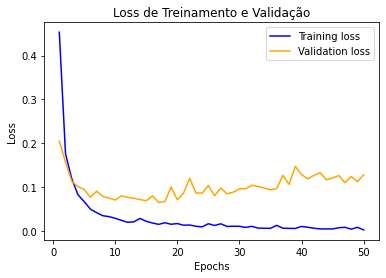

In [13]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='blue', label='Training loss')
plt.plot(epochs, val_loss, color='orange', label='Validation loss')
plt.title('Loss de Treinamento e Validação')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('mlp_loss_vs_epochs')
plt.show()

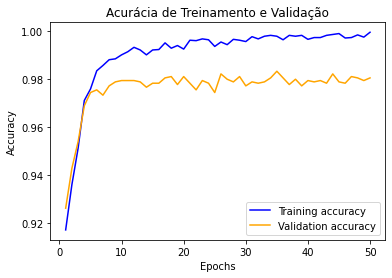

In [14]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
plt.plot(epochs, accuracy, color='blue', label='Training accuracy')
plt.plot(epochs, val_accuracy, color='orange', label='Validation accuracy')
plt.title('Acurácia de Treinamento e Validação')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('mlp_accuracy_vs_epochs')
plt.show()

In [15]:
from sklearn.metrics import classification_report

# normal (1) or suffers from hyperthyroidism (2) or hypothyroidism (3)

previsoes_argmax = np.argmax(previsoes, axis=1)
print(classification_report(teste_y, previsoes_argmax, target_names=["normal", 'hyperthyroidism', 'hypothyroidism']))

                 precision    recall  f1-score   support

         normal       0.83      0.73      0.78        41
hyperthyroidism       0.88      0.86      0.87        92
 hypothyroidism       0.99      0.99      0.99      1667

       accuracy                           0.98      1800
      macro avg       0.90      0.86      0.88      1800
   weighted avg       0.98      0.98      0.98      1800



In [16]:
from sklearn.metrics import accuracy_score


previsoes_argmax = np.argmax(previsoes, axis=1)
acuracia = accuracy_score(teste_y, previsoes_argmax) * 100
print(f'A acurácia foi {acuracia:.2f}%')

A acurácia foi 98.06%


Matriz de confusão


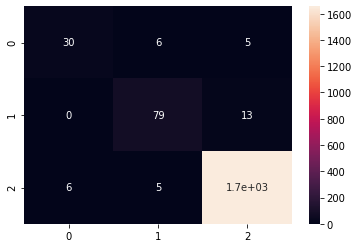

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

previsoes_argmax = np.argmax(previsoes, axis=1)
matriz_confusao = confusion_matrix(teste_y, previsoes_argmax)
print('Matriz de confusão')
sns.heatmap(matriz_confusao, annot=True)

In [18]:
acuracia = ((matriz_confusao[0,0] + matriz_confusao[1,1] + matriz_confusao[2, 2]) / len(teste_y)) * 100
print(f'A acurácia foi {acuracia:.2f}%')

A acurácia foi 98.06%
